In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Import the datasets from https://www.england.nhs.uk/statistics/statistical-work-areas/diagnostics-waiting-times-and-activity/diagnostics-census-data/
#I have combined the quarterly data into yearly csv files. 

#Each dataframe contains, for each quarter, the number of patients in the NHS which waited between 6 & 13 weeks and 
#the patients which waited over 13 weeks to recieve diagnostic treatment via consultant for different area's of medicine.
wait_time_2017_18=pd.read_csv("2017-18.csv")
wait_time_2016_17=pd.read_csv("2016-17.csv")
wait_time_2015_16=pd.read_csv("2015-16.csv")
wait_time_2014_15=pd.read_csv("2014-15.csv")
wait_time_2013_14=pd.read_csv("2013-14.csv")
wait_time_2012_13=pd.read_csv("2012-13.csv")
wait_time_2011_12=pd.read_csv("2011-12.csv")
wait_time_2010_11=pd.read_csv("2010-11.csv")
wait_time_2009_10=pd.read_csv("2009-10.csv")
wait_time_2008_09=pd.read_csv("2008-09.csv")

#List containing each dataframe.
wait_time_list=[wait_time_2017_18,wait_time_2016_17,wait_time_2015_16,wait_time_2014_15,wait_time_2013_14,wait_time_2012_13,wait_time_2011_12,wait_time_2010_11,wait_time_2009_10,wait_time_2008_09]

#Removing the empty row at the bottom of some dataframes.
for i in range(0,len(wait_time_list)):
    if wait_time_list[i].shape[0]>13:
        wait_time_list[i]=wait_time_list[i].drop(13)
               
    else:
        continue
#Check to see if all dataframes have the correct number of rows
for item in wait_time_list:
    if item.shape[0] != 13:
        print("Error, the table has too many columns")
    else:
        continue

#Rename columns of each dataframe, drop the repeated columns.
for i in range(0,len(wait_time_list)):
    if len(wait_time_list[i].columns)==12:
        wait_time_list[i].columns=["Department","06 < 13 Weeks, Q1","13+ Weeks, Q1","Area","06 < 13 Weeks, Q2","13+ Weeks, Q2","Area","06 < 13 Weeks, Q3","13+ Weeks, Q3","Area","06 < 13 Weeks, Q4","13+ Weeks, Q4"]
    if "Area" in wait_time_list[i].columns.values:
        wait_time_list[i]=wait_time_list[i].drop("Area", axis=1)
    if "Area" in list(wait_time_list[i].iloc[0]):
        wait_time_list[i]=wait_time_list[i].drop(0,axis=0)
        

#Remove the commas from the values within the dataframe and then convert them to floats.
        
for i in range(0,len(wait_time_list)):
    
    wait_time_list[i].iloc[:,wait_time_list[i].columns != "Department"]=wait_time_list[i].iloc[:,wait_time_list[i].columns != "Department"].apply(lambda x: x.str.replace(",","").astype(float))        
    wait_time_list[i][["06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4"]]=wait_time_list[i][["06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4"]].astype("float64")
    
    

#Add a totals column that sums the rows. 
for i in range(0,len(wait_time_list)):
    wait_time_list[i].loc[:,"total"]=wait_time_list[i].sum(axis=1, numeric_only=True) 

#Iterate through list to attach a row to each dataframe consisting of the year and remove the row totals. We'll convert these to column totals.

for i in range(0,len(wait_time_list)):
    years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
    wait_time_list[i].insert(0, "Year",[years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i],years[i]])
    wait_time_list[i]=wait_time_list[i].drop(12)
    wait_time_list[i]["Year"]=wait_time_list[i]["Year"].astype("string")
    
#Rename the individual data frames to reflect the changes in shape and added info.
wait_time_2017_18=wait_time_list[0]
wait_time_2016_17=wait_time_list[1]
wait_time_2015_16=wait_time_list[2]
wait_time_2014_15=wait_time_list[3]
wait_time_2013_14=wait_time_list[4]
wait_time_2012_13=wait_time_list[5]
wait_time_2011_12=wait_time_list[6]
wait_time_2010_11=wait_time_list[7]
wait_time_2009_10=wait_time_list[8]
wait_time_2008_09=wait_time_list[9]



#Function that we will use to put dataframes into one big super dataframe. To do this properly, will need to turn department row into column headings.
wait_time_all=pd.concat([wait_time_2017_18,wait_time_2016_17,wait_time_2015_16,wait_time_2014_15,wait_time_2013_14,wait_time_2012_13,wait_time_2011_12,wait_time_2010_11,wait_time_2009_10,wait_time_2008_09], axis=0)
wait_time_all=wait_time_all

In [3]:
wait_time_all

,Year,Department,"06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4",total
1,2017,Audiology,832.0,128.0,1546.0,276.0,1439.0,249.0,834.0,139.0,5443.0
2,2017,Cardiology,4733.0,1296.0,4392.0,1275.0,5119.0,1197.0,4647.0,1396.0,24055.0
3,2017,Endoscopy,5224.0,1686.0,5723.0,1851.0,5670.0,1874.0,5609.0,1362.0,28999.0
4,2017,GI Physiology,487.0,365.0,336.0,499.0,353.0,492.0,538.0,560.0,3630.0
5,2017,Imaging,8097.0,1116.0,7927.0,1051.0,9796.0,1177.0,12218.0,1949.0,43331.0
...,...,...,...,...,...,...,...,...,...,...,...
7,2008,Ophthalmic Science,478.0,363.0,469.0,90.0,560.0,72.0,390.0,7.0,2429.0
8,2008,Pathology,1029.0,674.0,1304.0,623.0,726.0,532.0,875.0,297.0,6060.0
9,2008,Respiratory Physiology,473.0,68.0,268.0,59.0,201.0,40.0,312.0,63.0,1484.0
10,2008,Urodynamics,255.0,41.0,88.0,29.0,113.0,3.0,122.0,4.0,655.0


In [4]:
wait_time_all.describe(include="all")

,Year,Department,"06 < 13 Weeks, Q1","13+ Weeks, Q1","06 < 13 Weeks, Q2","13+ Weeks, Q2","06 < 13 Weeks, Q3","13+ Weeks, Q3","06 < 13 Weeks, Q4","13+ Weeks, Q4",total
count,110,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,109.000000,110.000000
unique,10,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017,Audiology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1292.390909,313.781818,1183.590909,309.436364,1425.709091,295.900000,1345.881818,286.082569,6450.172727
std,NaN,NaN,1814.214345,466.485796,1613.236961,455.951058,1887.812901,393.679466,1952.734398,386.227939,8359.675071
min,NaN,NaN,14.000000,2.000000,27.000000,1.000000,9.000000,0.000000,12.000000,1.000000,81.000000
25%,NaN,NaN,224.250000,37.000000,198.250000,47.500000,254.500000,41.000000,216.250000,41.000000,1168.500000
50%,NaN,NaN,475.500000,127.500000,408.500000,149.000000,538.000000,140.000000,529.500000,143.000000,2696.500000
75%,NaN,NaN,1379.250000,361.500000,1437.500000,327.750000,1989.250000,458.500000,1534.250000,354.000000,8351.250000


F_onewayResult(statistic=21.71975995553645, pvalue=0.0001946170923185456)
F_onewayResult(statistic=15.79432811704416, pvalue=0.0008894903140461415)


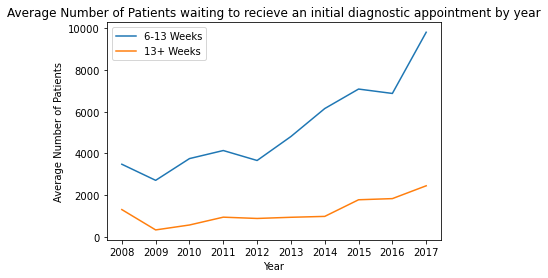

In [40]:
#Let's try and find the mean of all departments where the patient waited more than 13weeks for each year.

#List containing the years
years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]


#Select relevant columns, 13+weeks and year.
all_13_weeks=wait_time_all[(["Year","13+ Weeks, Q1","13+ Weeks, Q2","13+ Weeks, Q3","13+ Weeks, Q4"])]

#Take the mean of the selected columns: average number of patients who waited more than 13 weeks each year
mean_08_13_weeks=all_13_weeks[wait_time_all.Year=="2008"].sum(axis=1).mean()
mean_09_13_weeks=all_13_weeks[wait_time_all.Year=="2009"].sum(axis=1).mean()
mean_10_13_weeks=all_13_weeks[wait_time_all.Year=="2010"].sum(axis=1).mean()
mean_11_13_weeks=all_13_weeks[wait_time_all.Year=="2011"].sum(axis=1).mean()
mean_12_13_weeks=all_13_weeks[wait_time_all.Year=="2012"].sum(axis=1).mean()
mean_13_13_weeks=all_13_weeks[wait_time_all.Year=="2013"].sum(axis=1).mean()
mean_14_13_weeks=all_13_weeks[wait_time_all.Year=="2014"].sum(axis=1).mean()
mean_15_13_weeks=all_13_weeks[wait_time_all.Year=="2015"].sum(axis=1).mean()
mean_16_13_weeks=all_13_weeks[wait_time_all.Year=="2016"].sum(axis=1).mean()
mean_17_13_weeks=all_13_weeks[wait_time_all.Year=="2017"].sum(axis=1).mean()

#Select relevant columns, 6-13weeks and year
all_06_weeks=wait_time_all[(["Year","06 < 13 Weeks, Q1","06 < 13 Weeks, Q2","06 < 13 Weeks, Q3","06 < 13 Weeks, Q4"])]

#Take the mean of the selected columns: average number of patients who waited between 6-13 weeks each year
mean_08_06_weeks=all_06_weeks[wait_time_all.Year=="2008"].sum(axis=1).mean()
mean_09_06_weeks=all_06_weeks[wait_time_all.Year=="2009"].sum(axis=1).mean()
mean_10_06_weeks=all_06_weeks[wait_time_all.Year=="2010"].sum(axis=1).mean()
mean_11_06_weeks=all_06_weeks[wait_time_all.Year=="2011"].sum(axis=1).mean()
mean_12_06_weeks=all_06_weeks[wait_time_all.Year=="2012"].sum(axis=1).mean()
mean_13_06_weeks=all_06_weeks[wait_time_all.Year=="2013"].sum(axis=1).mean()
mean_14_06_weeks=all_06_weeks[wait_time_all.Year=="2014"].sum(axis=1).mean()
mean_15_06_weeks=all_06_weeks[wait_time_all.Year=="2015"].sum(axis=1).mean()
mean_16_06_weeks=all_06_weeks[wait_time_all.Year=="2016"].sum(axis=1).mean()
mean_17_06_weeks=all_06_weeks[wait_time_all.Year=="2017"].sum(axis=1).mean()

#list compiling the means of 6-13weeks
mean_06_weeks_list_year=[mean_17_06_weeks,mean_16_06_weeks,mean_15_06_weeks,mean_14_06_weeks,mean_13_06_weeks,mean_12_06_weeks,mean_11_06_weeks,mean_10_06_weeks,mean_09_06_weeks,mean_08_06_weeks]

#list compiling the means of 13+ weeks
mean_13_weeks_list_year=[mean_17_13_weeks,mean_16_13_weeks,mean_15_13_weeks,mean_14_13_weeks,mean_13_13_weeks,mean_12_13_weeks,mean_11_13_weeks,mean_10_13_weeks,mean_09_13_weeks,mean_08_13_weeks]
#produce scatter plot x: year, y: average  number of patients waiting 13+ or 6-13 weeks for initial diagnostic appt.
plt.title("Average Number of Patients waiting to recieve an initial diagnostic appointment by year")
plt.xlabel("Year")
plt.ylabel("Average Number of Patients")
plt.plot(years,mean_06_weeks_list_year,label="6-13 Weeks")
plt.plot(years,mean_13_weeks_list_year,label="13+ Weeks")
plt.gca().invert_xaxis()
plt.legend()
print(stats.f_oneway(mean_06_weeks_list_year,years))
print(stats.f_oneway(mean_13_weeks_list_year,years))

From the above plot, it can be seen that the average number of patients waiting for an initial diagnostic appointment increases each year from 2009, except from 2012 and 2016. This is true for number of patients for both 6-13 weeks and 13+ weeks waiting time.

Statistical F-test is performed on the data, this is because the data is in several groups (Year) and the F-test explores the variance of these groups to determine if the differences are statistically significant. The corresponding P-value for the 6-13 weeks and 13+ weeks waiting time over the course of 2008-2017 is ~0.01. 

This shows that the difference between the average number of patients waiting for an initial diagnostic appt and the year is statistically significant. I.e. the change from year upon year is not due to random chance and changes in a statistically significant way. 

Null hypothesis: There will be no significant difference between the average number of patients waiting over the years 2008-2017, any differences will be due to random chance.

Alt hypothesis: There is a statisically significant difference between the average number of patients waiting over the years between 2008-2017 within 99% confidence limits. 

In [102]:
#Lets do a chi square test to see if the year has an effect on pts waiting more or less time. Define less time as 6-13 weeks
#patients and define more time as 13+ weeks.
series_06_13 = wait_time_all["06 < 13 Weeks, Q1"] + wait_time_all["06 < 13 Weeks, Q2"] + wait_time_all["06 < 13 Weeks, Q3"] + wait_time_all["06 < 13 Weeks, Q4"]
series_13_plus = wait_time_all["13+ Weeks, Q1"]+wait_time_all["13+ Weeks, Q2"]+wait_time_all["13+ Weeks, Q3"]+wait_time_all["13+ Weeks, Q4"]
#wait_time_all.drop(wait_time_all.iloc([4,11]),axis="columns",inplace=True)
#wait_time_all.insert(3,"13+ Weeks Total", series_13_plus)
reduced_table = wait_time_all.loc[:,["Year","06 < 13 Weeks Total","13+ Weeks Total"]]
reduced_table
agg_functions = {'Year': 'first', '06 < 13 Weeks Total': 'sum', "13+ Weeks Total" : "sum" }

chi_square_df = reduced_table.groupby(wait_time_all["Year"]).aggregate(agg_functions)
chi_square_df

,Year,06 < 13 Weeks Total,13+ Weeks Total
Year,,,
2008,2008,38298.0,14387.0
2009,2009,29813.0,3676.0
2010,2010,41280.0,6269.0
2011,2011,45529.0,10396.0
2012,2012,40281.0,9718.0
2013,2013,52919.0,10336.0
2014,2014,67659.0,10803.0
2015,2015,77939.0,19572.0
2016,2016,75624.0,20179.0


In [133]:
f_obs1 = chi_square_df["06 < 13 Weeks Total"].values
f_obs2 = chi_square_df["13+ Weeks Total"].values
f_obs1
f_obs = np.array([[f_obs1],[f_obs2]]).T
res = stats.chi2_contingency(f_obs)
res

(6971.062214372822,
 0.0,
 9,
 array([[[ 42862.64850721,   9822.35149279]],
 
        [[ 27245.46333602,   6243.53666398]],
 
        [[ 38684.18095984,   8864.81904016]],
 
        [[ 45498.59766092,  10426.40233908]],
 
        [[ 40677.4141162 ,   9321.5858838 ]],
 
        [[ 51462.02583892,  11792.97416108]],
 
        [[ 63833.90200575,  14628.09799425]],
 
        [[ 79331.49318756,  18179.50681244]],
 
        [[ 77941.92492999,  17861.07507001]],
 
        [[109695.34945758,  25137.65054242]]]))

C:\Users\seb_d\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


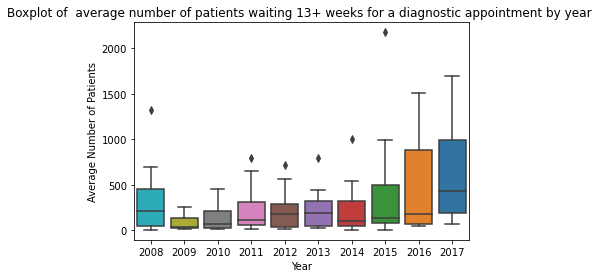

In [6]:
#Let's create a boxplot of the above plot for 13+ weeks.

#Create dataframe containing pertinent info
boxplot_df13=wait_time_all[(["Year","13+ Weeks, Q1","13+ Weeks, Q2","13+ Weeks, Q3","13+ Weeks, Q4"])]
#Create new column containing the average number of patients waiting across all 4 quarters
boxplot_df13.loc[:,"13+ weeks total mean"]=boxplot_df13.sum(axis=1, numeric_only=True)/4.0
#Create the box plot, 13+weeks total mean against year
sns.boxplot(data=boxplot_df13, x="Year", y="13+ weeks total mean")
#Axes labels and title
plt.ylabel("Average Number of Patients")
plt.xlabel("Year")
plt.title("Boxplot of  average number of patients waiting 13+ weeks for a diagnostic appointment by year ")
plt.gca().invert_xaxis()
plt.show()

The above boxplot shows that there is a relation between the average number of patients waiting 13+ weeks for an initial diagnostic appointment and the year. Particularly comparing later years; 2017, 2015 to 2009. This shows a relation between the year and the average number of patients waiting 13+ weeks. 

C:\Users\seb_d\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


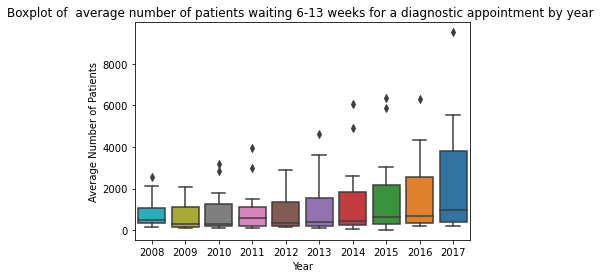

In [7]:
#Let's create a boxplot for 6-13 weeks.

#Create a dataframe with pertinent info.
boxplot_df6=wait_time_all[(["Year","06 < 13 Weeks, Q1","06 < 13 Weeks, Q2","06 < 13 Weeks, Q3","06 < 13 Weeks, Q4"])]
#Create a new column which contains the mean of patients waiting 6-13 weeks across all 4 quarters
boxplot_df6.loc[:,"06-13 weeks total mean"]=boxplot_df6.sum(axis=1, numeric_only=True)/4.0
#Create the box plot, 6-13 weeks total mean against year
sns.boxplot(data=boxplot_df6, x="Year", y="06-13 weeks total mean")
#Axis labels and title.
plt.ylabel("Average Number of Patients")
plt.xlabel("Year")
plt.title("Boxplot of  average number of patients waiting 6-13 weeks for a diagnostic appointment by year ")
plt.gca().invert_xaxis()
plt.show()

The above boxplot shows that there is a relation between the average number of patients waiting 6-13 weeks for an initial diagnostic appointment and the year. Particularly comparing later years; 2017, 2016 & 2015 to 2009. This shows a relation between the year and the average number of patients waiting 6-13 weeks. 

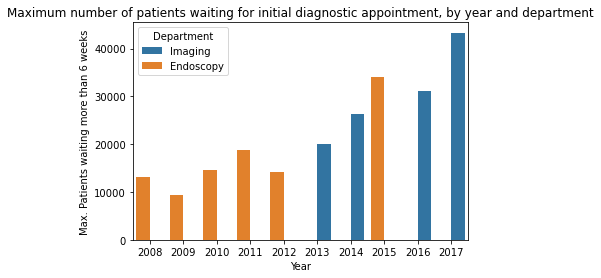

In [8]:
#Now lets find the busiest department each year.

#List of all years
years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]

#Slice our total dataframe to pertinent info.
year_dep_tot=wait_time_all[["Year","Department","total"]]

#select parts of dataframe by year, then find the maximum value within total.
dep_tot_17=year_dep_tot[year_dep_tot.Year=="2017"].query("total == total.max()")
dep_tot_16=year_dep_tot[year_dep_tot.Year=="2016"].query("total == total.max()")
dep_tot_15=year_dep_tot[year_dep_tot.Year=="2015"].query("total == total.max()")
dep_tot_14=year_dep_tot[year_dep_tot.Year=="2014"].query("total == total.max()")
dep_tot_13=year_dep_tot[year_dep_tot.Year=="2013"].query("total == total.max()")
dep_tot_12=year_dep_tot[year_dep_tot.Year=="2012"].query("total == total.max()")
dep_tot_11=year_dep_tot[year_dep_tot.Year=="2011"].query("total == total.max()")
dep_tot_10=year_dep_tot[year_dep_tot.Year=="2010"].query("total == total.max()")
dep_tot_09=year_dep_tot[year_dep_tot.Year=="2009"].query("total == total.max()")
dep_tot_08=year_dep_tot[year_dep_tot.Year=="2008"].query("total == total.max()")

#Create a list of variables containing max values.
dep_tot_all=pd.concat([dep_tot_17,dep_tot_16,dep_tot_15,dep_tot_14,dep_tot_13,dep_tot_12,dep_tot_11,dep_tot_10,dep_tot_09,dep_tot_08])

#Sorting by department label, create a bar plot. maximum number of patients waiting more than 6 weeks in a given year.
sns.barplot(x = dep_tot_all["Year"], y = dep_tot_all["total"], hue = "Department", data= dep_tot_all)
#Axis labels and title
plt.title("Maximum number of patients waiting for initial diagnostic appointment, by year and department")
plt.ylabel("Max. Patients waiting more than 6 weeks")
plt.gca().invert_xaxis()
plt.show()


The above bar plot shows that, in line with the average, the maximum number of patients waiting each year increases from 2009 (apart from 2012) to 2017. 

It also shows that more patients wait more than 6 weeks for Imaging and Endoscopy than any other discipline. 

Consequently, if more resources were allocated to imaging & endoscopy this would impact the most amount of patients waiting more than 6 weeks.

 

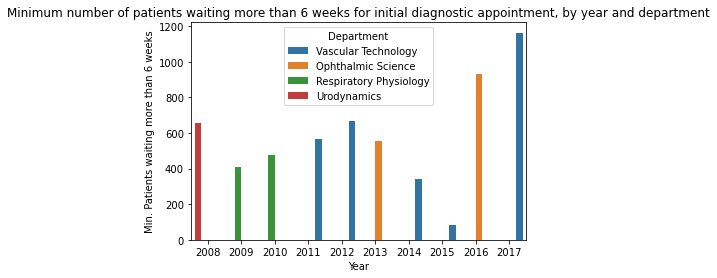

In [9]:

#Now lets find the quietest department each year.

#List of all years
years=["2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]

#Selecting pertinent data
year_dep_tot=wait_time_all[["Year","Department","total"]]
#select parts of dataframe by year, then find the minimum value within total.
dep_tot_17=year_dep_tot[year_dep_tot.Year=="2017"].query("total == total.min()")
dep_tot_16=year_dep_tot[year_dep_tot.Year=="2016"].query("total == total.min()")
dep_tot_15=year_dep_tot[year_dep_tot.Year=="2015"].query("total == total.min()")
dep_tot_14=year_dep_tot[year_dep_tot.Year=="2014"].query("total == total.min()")
dep_tot_13=year_dep_tot[year_dep_tot.Year=="2013"].query("total == total.min()")
dep_tot_12=year_dep_tot[year_dep_tot.Year=="2012"].query("total == total.min()")
dep_tot_11=year_dep_tot[year_dep_tot.Year=="2011"].query("total == total.min()")
dep_tot_10=year_dep_tot[year_dep_tot.Year=="2010"].query("total == total.min()")
dep_tot_09=year_dep_tot[year_dep_tot.Year=="2009"].query("total == total.min()")
dep_tot_08=year_dep_tot[year_dep_tot.Year=="2008"].query("total == total.min()")

#Create a list of variables containing min values.
dep_tot_all=pd.concat([dep_tot_17,dep_tot_16,dep_tot_15,dep_tot_14,dep_tot_13,dep_tot_12,dep_tot_11,dep_tot_10,dep_tot_09,dep_tot_08])
#Sorting by department label, create a bar plot. minimum number of patients waiting more than 6 weeks in a given year.

sns.barplot(x = dep_tot_all["Year"], y = dep_tot_all["total"], hue = "Department", data= dep_tot_all)
plt.title("Minimum number of patients waiting more than 6 weeks for initial diagnostic appointment, by year and department")
plt.ylabel("Min. Patients waiting more than 6 weeks")
plt.gca().invert_xaxis()
plt.show()


From the above barplot it can be seen that the departments which have the least patients waiting more than 6 weeks is Vascular Technology, Opthalmic Science, Respiratory Physiology and Urodynamics. The minimum number of patients waiting more than 6 weeks has increased from 2009, aside from 2013, 2014 & 2015.

